<a href="https://colab.research.google.com/github/JNarimatsu/7_Days_of_Code_Alura-Python-Pandas/blob/main/7DaysOfCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dia_1-Importando_dados

In [ ]:
import pandas as pd
import os
import glob

In [ ]:
# Caminho da pasta onde se encotra os arquivos CSV
caminho_pasta = '/content/drive/MyDrive/7DaysOfCode/Dia_1-Importando_dados/Datasets/dados_emprestimos'

In [ ]:
# Lista todos os arquivos CSV na pasta
arquivos_csv = glob.glob(os.path.join(caminho_pasta, '*.csv'))

In [ ]:
# Lê e concatena todos os CSVs em um único DataFrame
if not arquivos_csv:
    print(f"No CSV files found in the directory: {caminho_pasta}")
    print("Please check the path and ensure it contains CSV files.")
else:
    df_unificado = pd.concat([pd.read_csv(arquivo) for arquivo in arquivos_csv], ignore_index=True)
    display(df_unificado.head())

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,1028831,2011018942,NaN,2011/07/01 07:25:27.592000000,2011/07/01 18:58:29.000000000,2.011026e+09,ALUNO DE GRADUAÇÃO
1,1028832,2007009824,2011/07/13 14:30:22.933000000,2011/07/01 07:46:01.133000000,2011/07/28 09:27:13.000000000,2.009072e+09,ALUNO DE GRADUAÇÃO
2,1028833,2007009936,2011/07/13 14:30:22.883000000,2011/07/01 07:46:01.203000000,2011/07/22 08:24:33.000000000,2.009072e+09,ALUNO DE GRADUAÇÃO
3,1028834,2009055437,NaN,2011/07/01 07:52:18.019000000,2011/07/19 13:30:34.000000000,2.010065e+09,ALUNO DE GRADUAÇÃO
4,1028835,2010093874,NaN,2011/07/01 07:52:18.102000000,2011/07/19 13:30:47.000000000,2.010065e+09,ALUNO DE GRADUAÇÃO


In [ ]:
# Converter a coluna 'matricula_ou_siape' para string
df_unificado['matricula_ou_siape'] = df_unificado['matricula_ou_siape'].astype(str)

# Exibir novamente as primeiras linhas para verificar
display(df_unificado.head())

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,1028831,2011018942,NaN,2011/07/01 07:25:27.592000000,2011/07/01 18:58:29.000000000,2011025576.0,ALUNO DE GRADUAÇÃO
1,1028832,2007009824,2011/07/13 14:30:22.933000000,2011/07/01 07:46:01.133000000,2011/07/28 09:27:13.000000000,2009072448.0,ALUNO DE GRADUAÇÃO
2,1028833,2007009936,2011/07/13 14:30:22.883000000,2011/07/01 07:46:01.203000000,2011/07/22 08:24:33.000000000,2009072448.0,ALUNO DE GRADUAÇÃO
3,1028834,2009055437,NaN,2011/07/01 07:52:18.019000000,2011/07/19 13:30:34.000000000,2010065387.0,ALUNO DE GRADUAÇÃO
4,1028835,2010093874,NaN,2011/07/01 07:52:18.102000000,2011/07/19 13:30:47.000000000,2010065387.0,ALUNO DE GRADUAÇÃO


In [ ]:
# Converter as colunas de data para datetime, tratando erros
df_unificado['data_renovacao'] = pd.to_datetime(df_unificado['data_renovacao'], errors='coerce')
df_unificado['data_emprestimo'] = pd.to_datetime(df_unificado['data_emprestimo'], errors='coerce')
df_unificado['data_devolucao'] = pd.to_datetime(df_unificado['data_devolucao'], errors='coerce')


In [ ]:
# Formatar as colunas de data para 'dd/mm/aaaa hh:mm:ss'
df_unificado['data_renovacao'] = df_unificado['data_renovacao'].dt.strftime('%d/%m/%Y %H:%M:%S')
df_unificado['data_emprestimo'] = df_unificado['data_emprestimo'].dt.strftime('%d/%m/%Y %H:%M:%S')
df_unificado['data_devolucao'] = df_unificado['data_devolucao'].dt.strftime('%d/%m/%Y %H:%M:%S')


In [ ]:
display(df_unificado)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,1028831,2011018942,NaN,01/07/2011 07:25:27,01/07/2011 18:58:29,2011025576.0,ALUNO DE GRADUAÇÃO
1,1028832,2007009824,13/07/2011 14:30:22,01/07/2011 07:46:01,28/07/2011 09:27:13,2009072448.0,ALUNO DE GRADUAÇÃO
2,1028833,2007009936,13/07/2011 14:30:22,01/07/2011 07:46:01,22/07/2011 08:24:33,2009072448.0,ALUNO DE GRADUAÇÃO
3,1028834,2009055437,NaN,01/07/2011 07:52:18,19/07/2011 13:30:34,2010065387.0,ALUNO DE GRADUAÇÃO
4,1028835,2010093874,NaN,01/07/2011 07:52:18,19/07/2011 13:30:47,2010065387.0,ALUNO DE GRADUAÇÃO
...,...,...,...,...,...,...,...
2258013,2962504,2008047075,13/01/2020 23:27:18,30/12/2019 17:48:52,15/01/2020 18:52:27,20190064874.0,ALUNO DE GRADUAÇÃO
2258014,2962505,2014078494,13/01/2020 23:27:18,30/12/2019 17:48:52,15/01/2020 15:28:51,20190064874.0,ALUNO DE GRADUAÇÃO
2258015,2962506,2018014453,13/01/2020 23:27:18,30/12/2019 17:48:53,15/01/2020 15:29:08,20190064874.0,ALUNO DE GRADUAÇÃO
2258016,2962507,2010073307,NaN,30/12/2019 18:05:30,29/01/2020 16:05:27,20181023086.0,ALUNO DE PÓS-GRADUAÇÃO


## Verificando duplicatas

In [ ]:
df_unificado.value_counts()

,,,,,,,count
id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,
709704,2006021442,17/01/2010 18:56:43,04/01/2010 09:58:46,01/02/2010 13:59:02,2008009890.0,ALUNO DE GRADUAÇÃO,7
709705,2009032168,17/01/2010 18:56:43,04/01/2010 09:58:46,20/01/2010 13:14:34,2008009890.0,ALUNO DE GRADUAÇÃO,7
709698,2009047725,18/01/2010 14:44:41,04/01/2010 09:21:19,02/02/2010 12:02:38,2009046838.0,ALUNO DE GRADUAÇÃO,3
2351386,2015005192,16/01/2016 07:41:19,02/01/2016 10:02:44,30/01/2016 07:52:07,2015315556.0,ALUNO MÉDIO/TÉCNICO,2
2351387,2015004940,16/01/2016 07:41:19,02/01/2016 10:02:44,30/01/2016 07:52:00,2015315556.0,ALUNO MÉDIO/TÉCNICO,2
...,...,...,...,...,...,...,...
1443360,2008037301,18/03/2013 08:37:07,07/03/2013 11:08:06,01/04/2013 10:55:31,2011056170.0,ALUNO DE GRADUAÇÃO,1
1443362,2012031961,20/03/2013 04:46:10,07/03/2013 11:08:59,03/04/2013 13:59:19,2013024540.0,ALUNO DE GRADUAÇÃO,1
1443363,2008037123,22/03/2013 15:07:42,07/03/2013 11:10:09,08/04/2013 11:09:13,2011035741.0,ALUNO DE GRADUAÇÃO,1


## Excluindo Duplicatas

In [ ]:
df_unificado = df_unificado.drop_duplicates()

In [ ]:
df_unificado.value_counts()

,,,,,,,count
id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,
10322328,2014070441,15/01/2018 12:26:00,29/12/2017 18:21:09,31/01/2018 18:50:25,2014063294.0,ALUNO DE GRADUAÇÃO,1
709686,2006017618,26/01/2010 08:07:01,04/01/2010 08:08:44,25/02/2010 07:36:25,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,1
709687,L184117,18/01/2010 11:07:46,04/01/2010 08:24:21,03/02/2010 08:58:45,200721119.0,ALUNO DE GRADUAÇÃO,1
10322156,2014057679,29/01/2018 21:31:14,29/12/2017 14:11:46,27/02/2018 14:49:07,2016200660.0,ALUNO DE PÓS-GRADUAÇÃO,1
10322152,2014057666,29/01/2018 21:31:14,29/12/2017 14:11:46,27/02/2018 14:49:33,2016200660.0,ALUNO DE PÓS-GRADUAÇÃO,1
...,...,...,...,...,...,...,...
709701,L163841,19/01/2010 19:02:53,04/01/2010 09:48:05,04/02/2010 18:23:49,2008029450.0,ALUNO DE GRADUAÇÃO,1
709699,2009051872,18/01/2010 14:44:41,04/01/2010 09:21:19,02/02/2010 12:03:35,2009046838.0,ALUNO DE GRADUAÇÃO,1
709698,2009047725,18/01/2010 14:44:41,04/01/2010 09:21:19,02/02/2010 12:02:38,2009046838.0,ALUNO DE GRADUAÇÃO,1


In [ ]:
dados_exemplares = pd.read_parquet("/content/drive/MyDrive/7DaysOfCode/Dia_1-Importando_dados/Datasets/dados_exemplares.parquet")
dados_exemplares.head()

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15


In [ ]:
emprestimo_completo = df_unificado.merge(dados_exemplares)
emprestimo_completo

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,1028831,2011018942,NaN,01/07/2011 07:25:27,01/07/2011 18:58:29,2011025576.0,ALUNO DE GRADUAÇÃO,923553,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,645,160931
1,1028832,2007009824,13/07/2011 14:30:22,01/07/2011 07:46:01,28/07/2011 09:27:13,2009072448.0,ALUNO DE GRADUAÇÃO,174864,Acervo Circulante,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,REGULAR,684,66487
2,1028833,2007009936,13/07/2011 14:30:22,01/07/2011 07:46:01,22/07/2011 08:24:33,2009072448.0,ALUNO DE GRADUAÇÃO,186809,Acervo Circulante,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,REGULAR,658,71760
3,1028834,2009055437,NaN,01/07/2011 07:52:18,19/07/2011 13:30:34,2010065387.0,ALUNO DE GRADUAÇÃO,286092,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,REGULAR,610,125251
4,1028835,2010093874,NaN,01/07/2011 07:52:18,19/07/2011 13:30:47,2010065387.0,ALUNO DE GRADUAÇÃO,904847,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,REGULAR,627,163605
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072517,2962504,2008047075,13/01/2020 23:27:18,30/12/2019 17:48:52,15/01/2020 18:52:27,20190064874.0,ALUNO DE GRADUAÇÃO,255650,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,693,109656
2072518,2962505,2014078494,13/01/2020 23:27:18,30/12/2019 17:48:52,15/01/2020 15:28:51,20190064874.0,ALUNO DE GRADUAÇÃO,1171262,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,91,217317
2072519,2962506,2018014453,13/01/2020 23:27:18,30/12/2019 17:48:53,15/01/2020 15:29:08,20190064874.0,ALUNO DE GRADUAÇÃO,1336108,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,141,221988
2072520,2962507,2010073307,NaN,30/12/2019 18:05:30,29/01/2020 16:05:27,20181023086.0,ALUNO DE PÓS-GRADUAÇÃO,903708,Acervo Circulante,Biblioteca Setorial Prof. Alberto Moreira Camp...,REGULAR,671,163329


In [ ]:
# Salvar em um novo CSV unificado
emprestimo_completo.to_csv('emprestimo_completo.csv', index=False)

# Dia_02-As_primeiras_manipulacoes

Criar coluna com a definição da CDU; Exlusão do registro_sistema; casting da coluna matricula para string

CDU
000 a 099: Generalidades. Ciência e conhecimento.
100 a 199: Filosofia e psicologia.
200 a 299: Religião.
300 a 399: Ciências sociais.
400 a 499: Classe vaga. Provisoriamente não ocupada.
500 a 599: Matemática e ciências naturais.
600 a 699: Ciências aplicadas.
700 a 799: Belas artes.
800 a 899: Linguagem. Língua. Linguística.
900 a 999: Geografia. Biografia. História."

In [ ]:
# Já havia realizado o casting da coluna matricula para string
# Definir os bins (limites dos ranges) e os labels (nomes das classes)
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
labels = [
    'Generalidades. Ciência e conhecimento.',
    'Filosofia e psicologia.',
    'Religião.',
    'Ciências sociais.',
    'Classe vaga. Provisoriamente não ocupada.',
    'Matemática e ciências naturais.',
    'Ciências aplicadas.',
    'Belas artes.',
    'Linguagem. Língua. Linguística.',
    'Geografia. Biografia. História.'
]

# Criar a coluna 'classe_geral' usando pd.cut
# Certifique-se de que a coluna 'localizacao' seja numérica antes de usar pd.cut
emprestimo_completo['localizacao'] = pd.to_numeric(emprestimo_completo['localizacao'], errors='coerce')
emprestimo_completo['classe_geral'] = pd.cut(emprestimo_completo['localizacao'], bins=bins, labels=labels, right=False, include_lowest=True)

In [ ]:
# Exibir as primeiras linhas com a nova coluna 'classe_geral'
display(emprestimo_completo)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_geral
0,1028831,2011018942,NaN,01/07/2011 07:25:27,01/07/2011 18:58:29,2011025576.0,ALUNO DE GRADUAÇÃO,923553,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,645,Ciências aplicadas.
1,1028832,2007009824,13/07/2011 14:30:22,01/07/2011 07:46:01,28/07/2011 09:27:13,2009072448.0,ALUNO DE GRADUAÇÃO,174864,Acervo Circulante,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,REGULAR,684,Ciências aplicadas.
2,1028833,2007009936,13/07/2011 14:30:22,01/07/2011 07:46:01,22/07/2011 08:24:33,2009072448.0,ALUNO DE GRADUAÇÃO,186809,Acervo Circulante,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,REGULAR,658,Ciências aplicadas.
3,1028834,2009055437,NaN,01/07/2011 07:52:18,19/07/2011 13:30:34,2010065387.0,ALUNO DE GRADUAÇÃO,286092,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,REGULAR,610,Ciências aplicadas.
4,1028835,2010093874,NaN,01/07/2011 07:52:18,19/07/2011 13:30:47,2010065387.0,ALUNO DE GRADUAÇÃO,904847,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,REGULAR,627,Ciências aplicadas.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072517,2962504,2008047075,13/01/2020 23:27:18,30/12/2019 17:48:52,15/01/2020 18:52:27,20190064874.0,ALUNO DE GRADUAÇÃO,255650,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,693,Ciências aplicadas.
2072518,2962505,2014078494,13/01/2020 23:27:18,30/12/2019 17:48:52,15/01/2020 15:28:51,20190064874.0,ALUNO DE GRADUAÇÃO,1171262,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,91,Generalidades. Ciência e conhecimento.
2072519,2962506,2018014453,13/01/2020 23:27:18,30/12/2019 17:48:53,15/01/2020 15:29:08,20190064874.0,ALUNO DE GRADUAÇÃO,1336108,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,141,Filosofia e psicologia.
2072520,2962507,2010073307,NaN,30/12/2019 18:05:30,29/01/2020 16:05:27,20181023086.0,ALUNO DE PÓS-GRADUAÇÃO,903708,Acervo Circulante,Biblioteca Setorial Prof. Alberto Moreira Camp...,REGULAR,671,Ciências aplicadas.


In [ ]:
emprestimo_completo

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_geral
0,1028831,2011018942,NaN,01/07/2011 07:25:27,01/07/2011 18:58:29,2011025576.0,ALUNO DE GRADUAÇÃO,923553,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,645,Ciências aplicadas.
1,1028832,2007009824,13/07/2011 14:30:22,01/07/2011 07:46:01,28/07/2011 09:27:13,2009072448.0,ALUNO DE GRADUAÇÃO,174864,Acervo Circulante,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,REGULAR,684,Ciências aplicadas.
2,1028833,2007009936,13/07/2011 14:30:22,01/07/2011 07:46:01,22/07/2011 08:24:33,2009072448.0,ALUNO DE GRADUAÇÃO,186809,Acervo Circulante,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,REGULAR,658,Ciências aplicadas.
3,1028834,2009055437,NaN,01/07/2011 07:52:18,19/07/2011 13:30:34,2010065387.0,ALUNO DE GRADUAÇÃO,286092,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,REGULAR,610,Ciências aplicadas.
4,1028835,2010093874,NaN,01/07/2011 07:52:18,19/07/2011 13:30:47,2010065387.0,ALUNO DE GRADUAÇÃO,904847,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,REGULAR,627,Ciências aplicadas.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072517,2962504,2008047075,13/01/2020 23:27:18,30/12/2019 17:48:52,15/01/2020 18:52:27,20190064874.0,ALUNO DE GRADUAÇÃO,255650,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,693,Ciências aplicadas.
2072518,2962505,2014078494,13/01/2020 23:27:18,30/12/2019 17:48:52,15/01/2020 15:28:51,20190064874.0,ALUNO DE GRADUAÇÃO,1171262,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,91,Generalidades. Ciência e conhecimento.
2072519,2962506,2018014453,13/01/2020 23:27:18,30/12/2019 17:48:53,15/01/2020 15:29:08,20190064874.0,ALUNO DE GRADUAÇÃO,1336108,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,141,Filosofia e psicologia.
2072520,2962507,2010073307,NaN,30/12/2019 18:05:30,29/01/2020 16:05:27,20181023086.0,ALUNO DE PÓS-GRADUAÇÃO,903708,Acervo Circulante,Biblioteca Setorial Prof. Alberto Moreira Camp...,REGULAR,671,Ciências aplicadas.


# Dia_3-Explorando_o_Datetime_dos_dados

In [ ]:
#Verificar quantidade de emprestimos anuais e mensais;
#Verificar se os meses com maiores emprestimos são realmente março e setembro;
#Plotar um gráfico de linhas com emprestimos mensais;
#Verificar quais foram os horários com maior quantidade de empréstimos ao longo de um dia inteiro;
#Plotar um gráfico de barras e analise quais seriam os melhores horários para alocar as demais atividades que não sejam de atendimento ao usuário.

In [ ]:
emprestimo_completo['data_emprestimo'] = pd.to_datetime(emprestimo_completo['data_emprestimo'], dayfirst=True)


In [ ]:
# Extraindo o ano da coluna 'data_emprestimo'
emprestimo_completo['ano_emprestimo'] = emprestimo_completo['data_emprestimo'].dt.year

In [ ]:
# Extraindo o mês da coluna 'data_emprestimo'
emprestimo_completo['mes_emprestimo'] = emprestimo_completo['data_emprestimo'].dt.month

#Criando um dicionário para converter os meses de números para nomes
meses_portugues = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}

# Convertendo os números dos meses em nomes em portguês
emprestimo_completo['mes_emprestimo'] = emprestimo_completo['mes_emprestimo'].map(meses_portugues)

In [ ]:
emprestimo_completo['hora'] = emprestimo_completo['data_emprestimo'].dt.time

In [ ]:
display(emprestimo_completo)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_geral,ano_emprestimo,mes_emprestimo,hora
0,1028831,2011018942,NaN,2011-07-01 07:25:27,01/07/2011 18:58:29,2011025576.0,ALUNO DE GRADUAÇÃO,923553,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,645,Ciências aplicadas.,2011,Julho,07:25:27
1,1028832,2007009824,13/07/2011 14:30:22,2011-07-01 07:46:01,28/07/2011 09:27:13,2009072448.0,ALUNO DE GRADUAÇÃO,174864,Acervo Circulante,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,REGULAR,684,Ciências aplicadas.,2011,Julho,07:46:01
2,1028833,2007009936,13/07/2011 14:30:22,2011-07-01 07:46:01,22/07/2011 08:24:33,2009072448.0,ALUNO DE GRADUAÇÃO,186809,Acervo Circulante,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,REGULAR,658,Ciências aplicadas.,2011,Julho,07:46:01
3,1028834,2009055437,NaN,2011-07-01 07:52:18,19/07/2011 13:30:34,2010065387.0,ALUNO DE GRADUAÇÃO,286092,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,REGULAR,610,Ciências aplicadas.,2011,Julho,07:52:18
4,1028835,2010093874,NaN,2011-07-01 07:52:18,19/07/2011 13:30:47,2010065387.0,ALUNO DE GRADUAÇÃO,904847,Acervo Circulante,Biblioteca Setorial do Centro Ciências da Saúd...,REGULAR,627,Ciências aplicadas.,2011,Julho,07:52:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072517,2962504,2008047075,13/01/2020 23:27:18,2019-12-30 17:48:52,15/01/2020 18:52:27,20190064874.0,ALUNO DE GRADUAÇÃO,255650,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,693,Ciências aplicadas.,2019,Dezembro,17:48:52
2072518,2962505,2014078494,13/01/2020 23:27:18,2019-12-30 17:48:52,15/01/2020 15:28:51,20190064874.0,ALUNO DE GRADUAÇÃO,1171262,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,91,Generalidades. Ciência e conhecimento.,2019,Dezembro,17:48:52
2072519,2962506,2018014453,13/01/2020 23:27:18,2019-12-30 17:48:53,15/01/2020 15:29:08,20190064874.0,ALUNO DE GRADUAÇÃO,1336108,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,141,Filosofia e psicologia.,2019,Dezembro,17:48:53
2072520,2962507,2010073307,NaN,2019-12-30 18:05:30,29/01/2020 16:05:27,20181023086.0,ALUNO DE PÓS-GRADUAÇÃO,903708,Acervo Circulante,Biblioteca Setorial Prof. Alberto Moreira Camp...,REGULAR,671,Ciências aplicadas.,2019,Dezembro,18:05:30


In [ ]:
# agrupando ano e contando o número de empréstimos
emprestimos_por_ano = emprestimo_completo.groupby('ano_emprestimo')['id_emprestimo'].count()
emprestimos_por_mes = emprestimo_completo.groupby('mes_emprestimo')['id_emprestimo'].count()
emprestimo_por_hora = emprestimo_completo.groupby('hora')['id_emprestimo'].count()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Filtrar o DataFrame para o ano de 2020
emprestimos_2020 = emprestimo_completo[emprestimo_completo['ano_emprestimo'] == 2020]

# Agrupar por mês e contar os empréstimos
emprestimos_2020_por_mes = emprestimos_2020.groupby('mes_emprestimo')['id_emprestimo'].count()

# Exibir o resultado
display(emprestimos_2020_por_mes)

# Calcular a média de empréstimos no ano de 2020
media_emprestimos_2020 = emprestimos_2020['id_emprestimo'].count() / emprestimos_2020['mes_emprestimo'].nunique()

# Exibir a média
print(f"A média de empréstimos no ano de 2020 entre os meses de Janeiro a Junho é: {media_emprestimos_2020:.2f}")



,id_emprestimo
mes_emprestimo,
Fevereiro,10667
Janeiro,3585
Junho,2
Maio,8
Março,11348


A média de empréstimos no ano de 2020 entre os meses de Janeiro a Junho é: 5122.00


In [ ]:
# Filtrar o DataFrame para os anos entre 2010 e 2019 e meses de Janeiro a Junho
emprestimos_jan_jun_2010_2019 = emprestimo_completo[
    (emprestimo_completo['ano_emprestimo'] >= 2010) &
    (emprestimo_completo['ano_emprestimo'] <= 2019) &
    (emprestimo_completo['mes_emprestimo'].isin(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho']))
]

# Calcular a média de empréstimos para o período
media_emprestimos_jan_jun_2010_2019 = emprestimos_jan_jun_2010_2019['id_emprestimo'].count() / emprestimos_jan_jun_2010_2019['ano_emprestimo'].nunique() / emprestimos_jan_jun_2010_2019['mes_emprestimo'].nunique()


# Exibir a média
print(f"A média de empréstimos entre os anos de 2010 a 2019 nos meses de Janeiro a Junho é: {media_emprestimos_jan_jun_2010_2019:.2f}")

A média de empréstimos entre os anos de 2010 a 2019 nos meses de Janeiro a Junho é: 17561.12


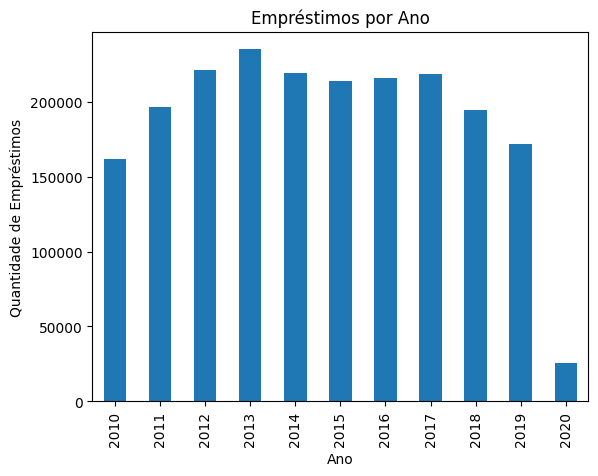

In [ ]:
emprestimos_por_ano.plot(kind='bar')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Empréstimos')
plt.title('Empréstimos por Ano')
plt.show()

Entre os anos de 2010 a 2013 tivemos uma alta nos empréstimos, seguido por uma estabilização entre os anos de 2014 a 2017, a partir de 2018 tivemos uma queda apresentando a menor quantidade de empréstimos no ano de 2020, visto que a média dos demais anos no primeiro semestre apresentavam números mais expressivos.

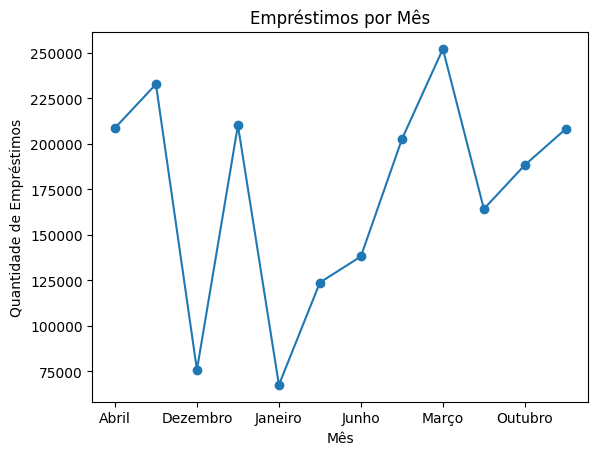

In [ ]:
emprestimos_por_mes.plot(kind='line', marker= 'o')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Empréstimos')
plt.title('Empréstimos por Mês')
plt.show()

É possível verificar que Março apresenta uma alta nos empréstimos, mas setembro não apresenta o mesmo quadro.